<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

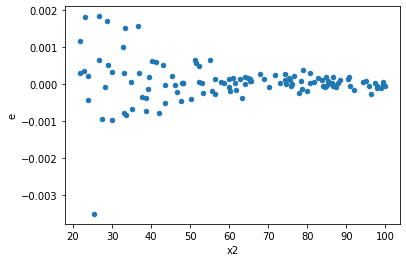

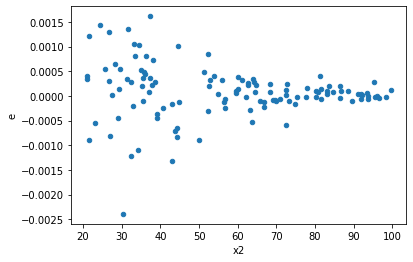

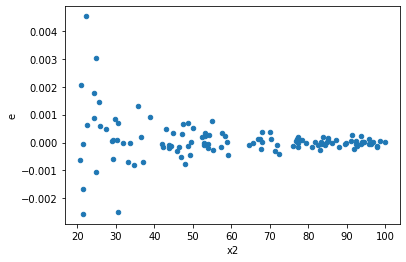

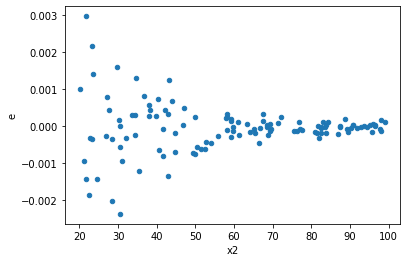

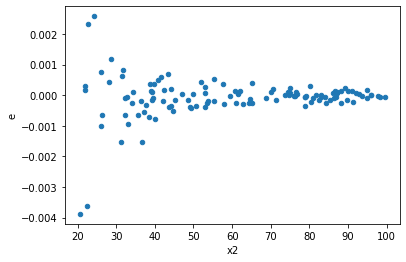

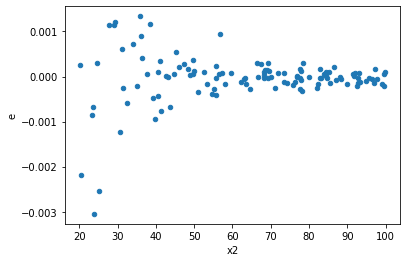

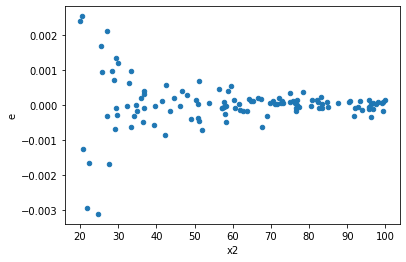

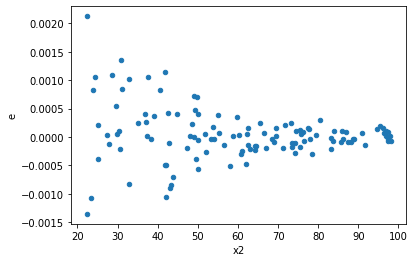

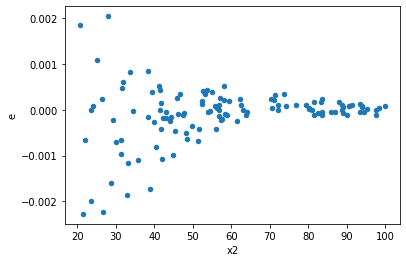

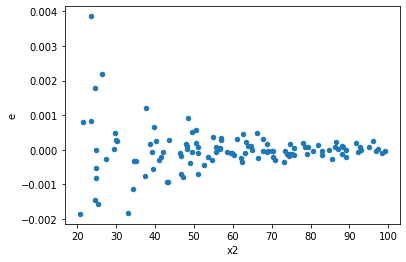

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,7.197252195050576e-05,8.669375577436882e-07,1.5993893766779058e-06,1.926527906097085e-08,0.012045396413090347,1.6358897587750822e-31,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3.2065016207007415e-05,1.0920198018303924e-06,7.125559157112758e-07,2.4267106707342053e-08,0.03405642444652016,9.279236036200035e-22,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,3.285326150305896e-05,1.425579930649603e-06,7.300724778457547e-07,3.167955401443562e-08,0.04339234113839405,1.4685849671959786e-19,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,3.5477516333948646e-05,1.0349929754133774e-06,7.883892518655255e-07,2.2999843898075054e-08,0.029173208340488775,3.496583620968791e-23,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2.533854496949034e-05,1.4684602131546415e-06,5.630787770997853e-07,3.2632449181214253e-08,0.05795361236893383,5.4399658803768106e-17,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,4.530432230602785e-05,4.3689494578377614e-07,1.0067627179117302e-06,9.708776572972803e-09,0.009643559897719652,1.21636088075393e-33,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,4.333689708330571e-05,5.844604870254483e-07,9.630421574067936e-07,1.298801082278774e-08,0.01348644057053625,1.9559510102171944e-30,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,6.547976464184623e-05,1.033434938600919e-06,1.4551058809299164e-06,2.29652208577982e-08,0.015782508447510217,6.099697758000384e-29,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,4.583543647841157e-05,1.1443050631761156e-06,1.0185652550758128e-06,2.542900140391368e-08,0.024965510336420197,1.2538297739321891e-24,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64